In [20]:
import os
import pandas as pd
import numpy as np
import re

def dataseq():
    sequences = {}

    # Define base folders and corresponding LOS values
    folders_with_los = {
        './General_vehsPerHour_500/': 'A',
        './General_vehsPerHour_800/': 'B'
    }

    # Regex patterns to match the modules
    mobility_pattern = re.compile(r'RSUExampleScenario3\.target\[\d+\]\.veinsmobility$')
    appl_pattern = re.compile(r'RSUExampleScenario3\.target\[\d+\]\.appl$')

    for base_path, los in folders_with_los.items():
        for dep in range(895, 896):  # Adjust range as needed
            folder = os.path.join(base_path, f'depart_{dep}')

            for iter_num in range(1, 31):  # iter_1 to iter_30
                file_path = os.path.join(folder, f'General_depart_{dep}_iter_{iter_num}_vector.csv')
                print(file_path)
                if not os.path.exists(file_path):
                    print(f"⚠️ File not found: {file_path}")
                    continue

                try:
                    df = pd.read_csv(file_path)
                except Exception as e:
                    print(f"❌ Error reading {file_path}: {e}")
                    continue

                # Step 1: Extract anomaly timestamps
                anomaly_times = set()
                anomaly_data = df[
                    (df['type'] == 'vector') &
                    (df['module'].str.match(appl_pattern)) &
                    (df['name'] == 'Target Received Messages Timestamp')
                ]

                for _, row in anomaly_data.iterrows():
                    try:
                        times = [int(float(t)) for t in row['vectime'].split()]
                        values = [int(float(v)) for v in row['vecvalue'].split()]
                        for t, v in zip(times, values):
                            if v == 1:
                                anomaly_times.add(t)
                    except Exception as e:
                        print(f"⚠️ Error parsing anomaly data in {file_path}: {e}")

                # Step 2: Extract mobility data (speed, posx, posy, acceleration)
                mobility_features = ['speed', 'posx', 'posy', 'acceleration']
                mobility_data = {feature: {} for feature in mobility_features}

                for feature in mobility_features:
                    feature_data = df[
                        (df['type'] == 'vector') &
                        (df['module'].str.match(mobility_pattern)) &
                        (df['name'] == feature)
                    ]

                    for _, row in feature_data.iterrows():
                        try:
                            times = [int(float(t)) for t in row['vectime'].split()]
                            values = [float(v) for v in row['vecvalue'].split()]
                            if len(times) == len(values):
                                for t, val in zip(times, values):
                                    if t not in mobility_data[feature]:
                                        mobility_data[feature][t] = val
                        except Exception as e:
                            print(f"⚠️ Error parsing {feature} data in {file_path}: {e}")

                # Step 3: Create aligned sequence with all features
                if mobility_data['speed']:
                    common_times = sorted(set(mobility_data['speed'].keys()))
                    feature_arrays = {
                        feature: np.array([mobility_data[feature].get(t, np.nan) for t in common_times], dtype=float)
                        for feature in mobility_features
                    }
                    labels = np.array([1 if t in anomaly_times else 0 for t in common_times], dtype=int)

                    sequences[(los, dep, iter_num)] = (
                        np.array(common_times, dtype=int),
                        feature_arrays,  # Dictionary of features
                        labels
                    )
                else:
                    print(f"⚠️ No mobility data found in {file_path}")

    return sequences

# Run the function
sequences = dataseq()


./General_vehsPerHour_500/depart_895/General_depart_895_iter_1_vector.csv
./General_vehsPerHour_500/depart_895/General_depart_895_iter_2_vector.csv
./General_vehsPerHour_500/depart_895/General_depart_895_iter_3_vector.csv
./General_vehsPerHour_500/depart_895/General_depart_895_iter_4_vector.csv
./General_vehsPerHour_500/depart_895/General_depart_895_iter_5_vector.csv
./General_vehsPerHour_500/depart_895/General_depart_895_iter_6_vector.csv
./General_vehsPerHour_500/depart_895/General_depart_895_iter_7_vector.csv
./General_vehsPerHour_500/depart_895/General_depart_895_iter_8_vector.csv
./General_vehsPerHour_500/depart_895/General_depart_895_iter_9_vector.csv
./General_vehsPerHour_500/depart_895/General_depart_895_iter_10_vector.csv
./General_vehsPerHour_500/depart_895/General_depart_895_iter_11_vector.csv
./General_vehsPerHour_500/depart_895/General_depart_895_iter_12_vector.csv
./General_vehsPerHour_500/depart_895/General_depart_895_iter_13_vector.csv
./General_vehsPerHour_500/depart_8

In [21]:
# sequences = dataseq('./General_vehsPerHour_500/')

# Access data for departure 895, iteration 5
# dep, iter = 895, 5
# times, speeds, labels = sequences[(dep, iter)]

# Get all departure numbers and iteration numbers available
available_sequences = list(sequences.keys())

In [22]:
available_sequences, len(available_sequences)

([('A', 895, 1),
  ('A', 895, 2),
  ('A', 895, 3),
  ('A', 895, 4),
  ('A', 895, 5),
  ('A', 895, 6),
  ('A', 895, 7),
  ('A', 895, 8),
  ('A', 895, 9),
  ('A', 895, 10),
  ('A', 895, 11),
  ('A', 895, 12),
  ('A', 895, 13),
  ('A', 895, 14),
  ('A', 895, 15),
  ('A', 895, 16),
  ('A', 895, 17),
  ('A', 895, 18),
  ('A', 895, 19),
  ('A', 895, 20),
  ('A', 895, 21),
  ('A', 895, 22),
  ('A', 895, 23),
  ('A', 895, 24),
  ('A', 895, 25),
  ('A', 895, 26),
  ('A', 895, 27),
  ('A', 895, 28),
  ('A', 895, 29),
  ('A', 895, 30),
  ('B', 895, 1),
  ('B', 895, 2),
  ('B', 895, 3),
  ('B', 895, 4),
  ('B', 895, 5),
  ('B', 895, 6),
  ('B', 895, 7),
  ('B', 895, 8),
  ('B', 895, 9),
  ('B', 895, 10),
  ('B', 895, 11),
  ('B', 895, 12),
  ('B', 895, 13),
  ('B', 895, 14),
  ('B', 895, 15),
  ('B', 895, 16),
  ('B', 895, 17),
  ('B', 895, 18),
  ('B', 895, 19),
  ('B', 895, 20),
  ('B', 895, 21),
  ('B', 895, 22),
  ('B', 895, 23),
  ('B', 895, 24),
  ('B', 895, 25),
  ('B', 895, 26),
  ('B', 89

In [27]:
times, f, labels = sequences[available_sequences[0]]
f['posx']

array([  32.74918636,   36.94603475,   43.04127632,   51.11879128,
         61.08659012,   73.0899366 ,   87.20122862,  103.22393296,
        120.55872069,  137.49785286,  154.01097342,  170.12534119,
        185.95272101,  201.5655114 ,  216.95770678,  232.19585792,
        247.32308623,  262.33539277,  277.26168589,  292.14599261,
        306.96866136,  321.73520492,  336.48654023,  351.22689314,
        364.34900231,  374.89814889,  383.37883536,  390.19664213,
        395.67762404,  400.08390362,  403.62620681,  406.47394075,
        408.76329548,  410.60375713,  412.08334394,  413.2728157 ,
        414.22905769,  414.99780126,  415.6158108 ,  416.11264199,
        416.5120553 ,  416.83315228,  417.09128907,  417.29881079,
        417.46564199,  417.59976118,  417.7075825 ,  417.79426238,
        417.8639462 ,  417.9183149 ,  417.96067174,  417.99472331,
        418.0220981 ,  418.04410529,  418.06179734,  418.07602037,
        418.08711745,  418.09576282,  418.10271301,  418.10830

169 0 169


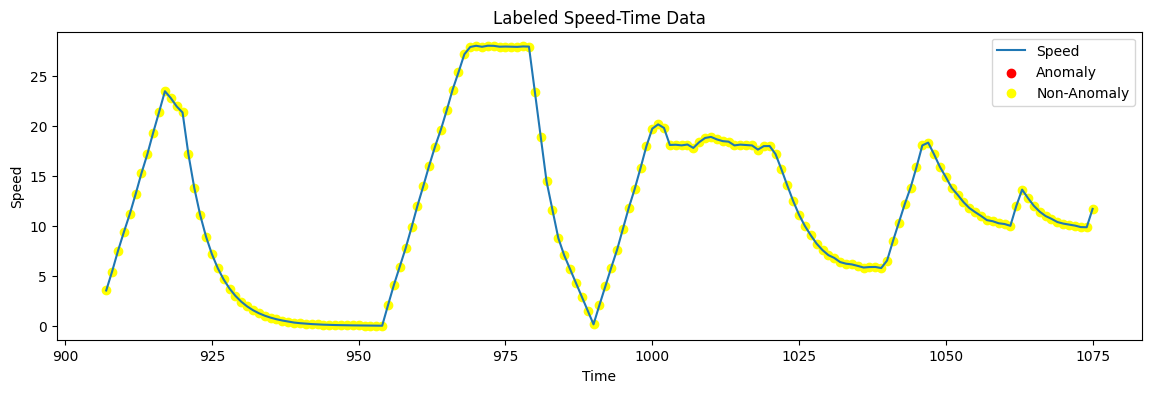

In [8]:
times, speeds, labels = sequences[(901,6)]#[available_sequences[0]]
print(len(times) , len(times[labels == 1]), len(times[labels == 0]))

import matplotlib.pyplot as plt

plt.figure(figsize=(14, 4))
plt.plot(times, speeds, label="Speed")
plt.scatter(times[labels == 1], speeds[labels == 1], color='red', label="Anomaly")
plt.scatter(times[labels == 0], speeds[labels == 0], color='yellow', label="Non-Anomaly")
plt.title("Labeled Speed-Time Data")
plt.xlabel("Time")
plt.ylabel("Speed")
plt.legend()
plt.show()


📦 Window 1: [897.00, 907.00) — 10 points
  Time: 897.00, Speed: 3.08, Label: Normal
  Time: 898.00, Speed: 5.02, Label: Normal
  Time: 899.00, Speed: 7.02, Label: Normal
  Time: 900.00, Speed: 8.95, Label: Normal
  Time: 901.00, Speed: 10.87, Label: Normal
  Time: 902.00, Speed: 12.93, Label: Normal
  Time: 903.00, Speed: 15.01, Label: Normal
  Time: 904.00, Speed: 10.51, Label: Normal
  Time: 905.00, Speed: 6.01, Label: Normal
  Time: 906.00, Speed: 3.15, Label: Normal

📦 Window 2: [907.00, 917.00) — 10 points
  Time: 907.00, Speed: 1.65, Label: Normal
  Time: 908.00, Speed: 0.86, Label: Normal
  Time: 909.00, Speed: 0.45, Label: Normal
  Time: 910.00, Speed: 0.24, Label: Normal
  Time: 911.00, Speed: 0.12, Label: Normal
  Time: 912.00, Speed: 0.07, Label: Normal
  Time: 913.00, Speed: 0.03, Label: Normal
  Time: 914.00, Speed: 0.02, Label: Normal
  Time: 915.00, Speed: 0.01, Label: Normal
  Time: 916.00, Speed: 0.00, Label: Normal

📦 Window 3: [917.00, 927.00) — 10 points
  Time: 91

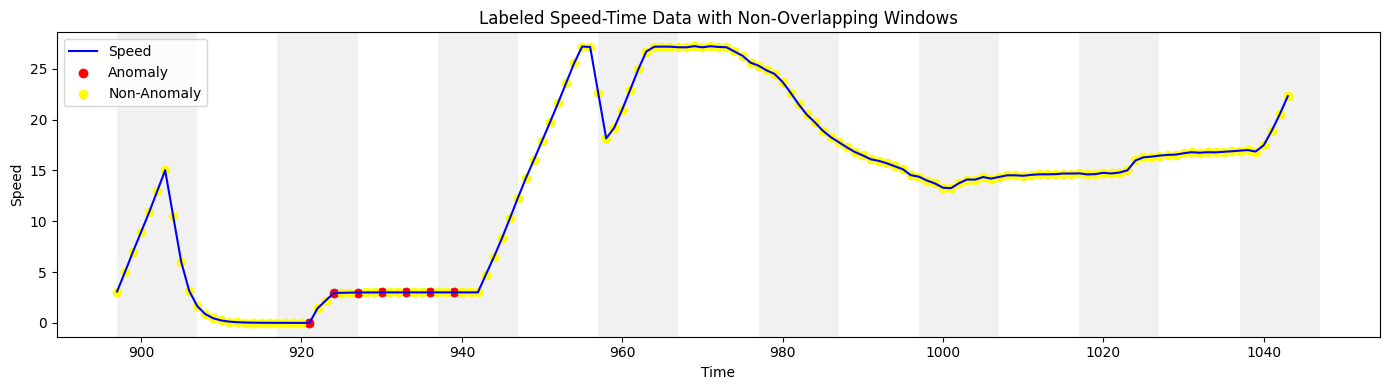

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Assume data is already loaded
# times, speeds, labels = sequences[available_sequences[0]]

# User-defined window size
window_size = 10.0

# Ensure arrays are numpy
times = np.array(times)
speeds = np.array(speeds)
labels = np.array(labels)

# Get start and end of time
start_time = np.min(times)
end_time = np.max(times)
num_windows = int(np.ceil((end_time - start_time) / window_size))

plt.figure(figsize=(14, 4))

# Plot background windows and print data per window
for i in range(num_windows):
    window_start = start_time + i * window_size
    window_end = window_start + window_size
    color = 'lightgrey' if i % 2 == 0 else 'white'
    plt.axvspan(window_start, window_end, facecolor=color, alpha=0.3)

    # Find indices of points in this window
    in_window = (times >= window_start) & (times < window_end)
    window_times = times[in_window]
    window_speeds = speeds[in_window]
    window_labels = labels[in_window]

    # Print window data
    print(f"\n📦 Window {i+1}: [{window_start:.2f}, {window_end:.2f}) — {len(window_times)} points")
    for t, s, l in zip(window_times, window_speeds, window_labels):
        status = "Anomaly" if l == 1 else "Normal"
        print(f"  Time: {t:.2f}, Speed: {s:.2f}, Label: {status}")

# Plot actual data
plt.plot(times, speeds, label="Speed", color='blue')
plt.scatter(times[labels == 1], speeds[labels == 1], color='red', label="Anomaly")
plt.scatter(times[labels == 0], speeds[labels == 0], color='yellow', label="Non-Anomaly")

plt.title("Labeled Speed-Time Data with Non-Overlapping Windows")
plt.xlabel("Time")
plt.ylabel("Speed")
plt.legend()
plt.tight_layout()
plt.show()
